In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [13]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}  # Mean of features per class
        self.variance = {}  # Variance of features per class
        self.priors = {}  # Prior probabilities per class

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.variance[c] = X_c.var(axis=0)
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def gaussian_pdf(self, x, mean, var):
        eps = 1e-6  # Small value to avoid division by zero
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-((x - mean) ** 2) / (2 * var + eps))
        return coeff * exponent

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = np.sum(np.log(self.gaussian_pdf(x, self.mean[c], self.variance[c])))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

In [27]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [33]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.00%


In [37]:
# Show Actual vs Predicted Values
print("Actual Values:", y_test)
print("Predicted Values:", y_pred)

Actual Values: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predicted Values: [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0]


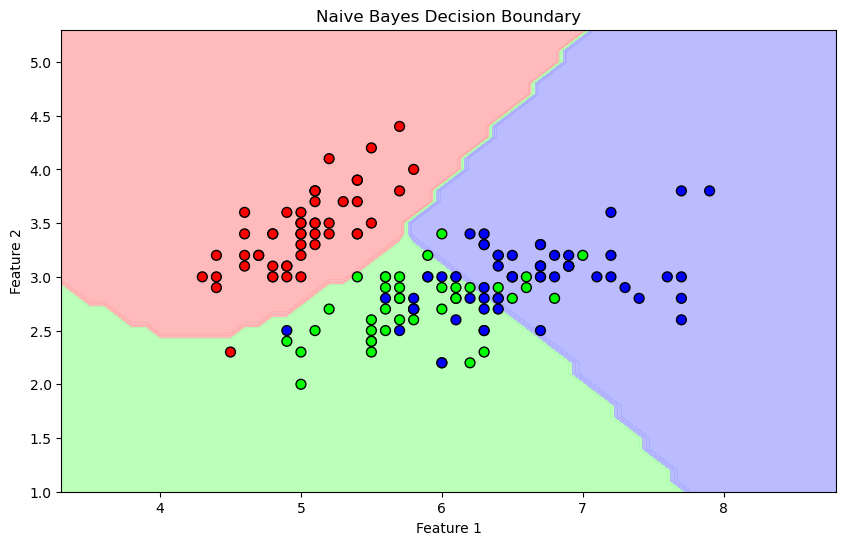

In [39]:
# Plot Decision Boundary
def plot_decision_boundary(X, y, model):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.title("Naive Bayes Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, nb)